## Import Modules

In [1]:

#!/usr/local/bin/python3.9 -m ipykernel install --user --name=python_3.9_kernel
#!/usr/local/bin/python3.9 -m pip install matplotlib 
#!/usr/local/bin/python3.9 -m pip install tensorflow
#!/usr/local/bin/python3.9 -m pip install opencv-python
import tensorflow as tf
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.executable





'/usr/local/bin/python3.9'

## images check

In [178]:
image_exts = ['jpeg','jpg','png']
print(image_exts)
data_dir ='dataVerus'


['jpeg', 'jpg', 'png']


(193, 262, 3)


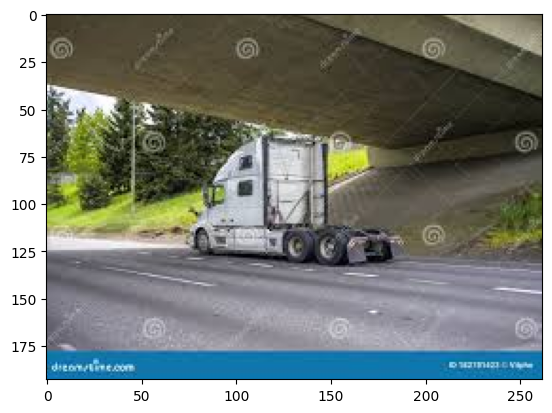

In [179]:
img0 = cv2.imread(os.path.join(data_dir, 'Truck','Truck2', "images32.jpg"))
print(img0.shape)
plt.imshow(cv2.cvtColor(img0,cv2.COLOR_BGR2RGB))
plt.show()


Found 356 files belonging to 2 classes.


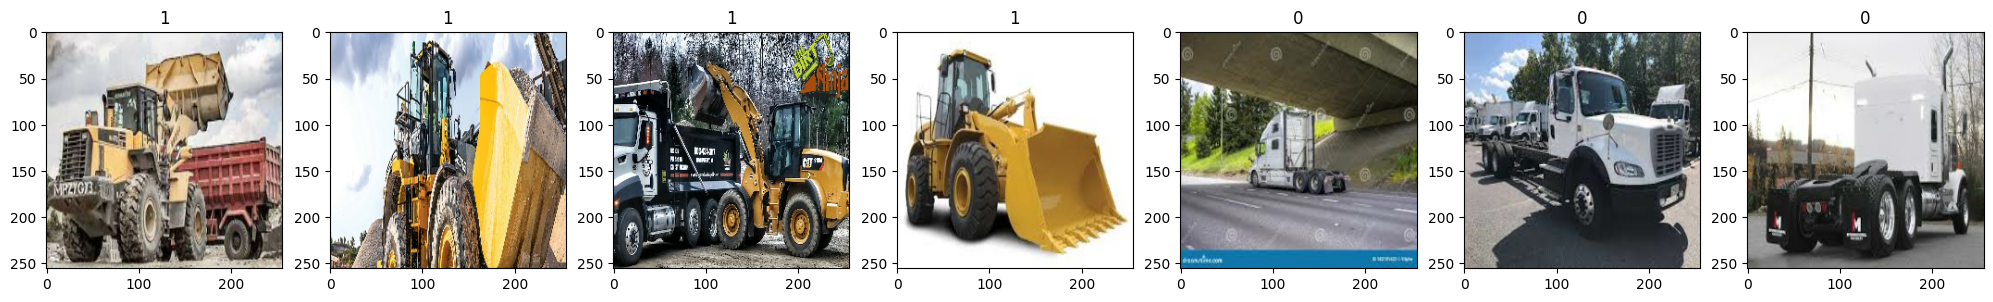

In [175]:

tf.data.Dataset.list_files("dataVerus", shuffle=True)
data = tf.keras.utils.image_dataset_from_directory('dataVerus')
tf.keras.utils.image_dataset_from_directory
data = data.map(lambda x,y: (x/255, y))

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=7, figsize=(25,25))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
class_files_dict = {}

for image_class in Classes:
    class_files = []  # List to store files for this particular class
    for dirpath, dirnames, filenames in os.walk(os.path.join(data_dir, image_class)):
        for filename in filenames:  # loop through all files in the current directory
            if filename.endswith('.jpg')or filename.endswith('.png') or filename.endswith('.jpeg'):
                class_files.append(os.path.join(dirpath, filename))
    class_files_dict[image_class] = class_files

In [191]:
def list_subdirectories(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]




In [196]:
data_dir ='dataVerus'
folder_path = data_dir  # Replace with your directory path
subdirectories = list_subdirectories(folder_path)
MainClasses = subdirectories
print(subdirectories)

['WheelLoader', 'Truck']


['WheelLoader', 'Truck']
Found 356 files belonging to 2 classes.
8 2 2
Test Batchs: 2
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 16)        4624      
                                  

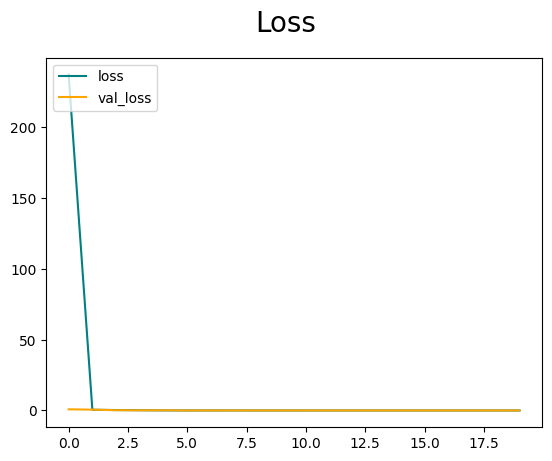

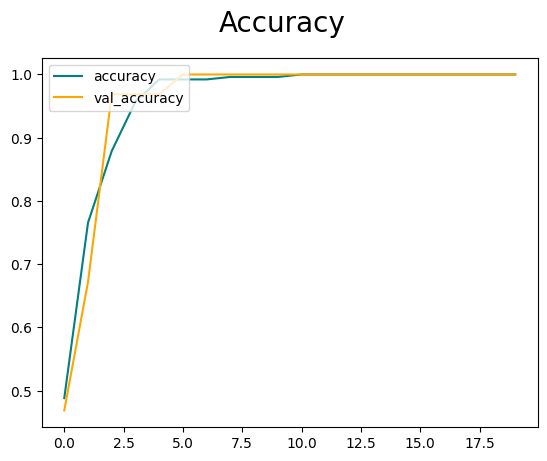

1/1 [==============================] - 0s 39ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
Found 0 files belonging to 0 classes.
Found 356 files belonging to 2 classes.
8 2 2
Test Batchs: 2
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                         

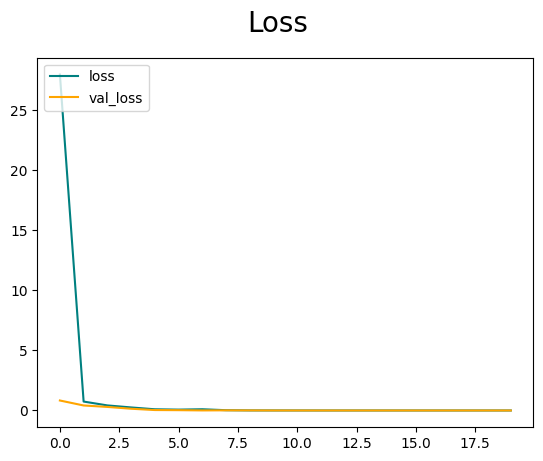

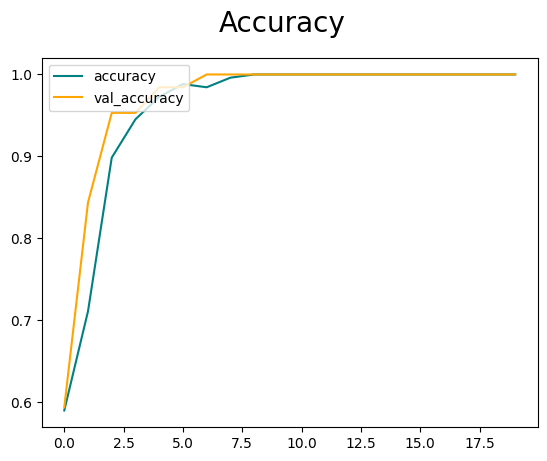

1/1 [==============================] - 0s 41ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
Found 142 files belonging to 2 classes.
3 1 1
Test Batchs: 1
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                  

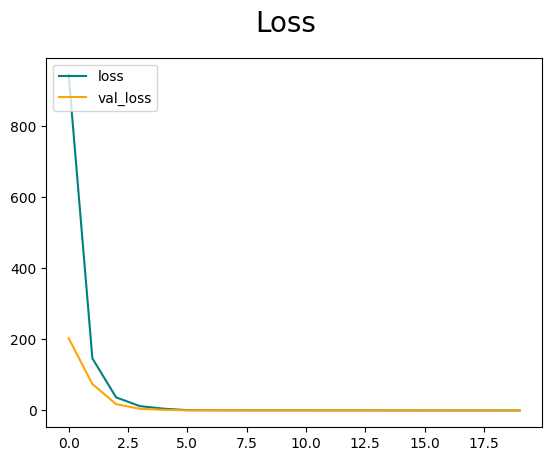

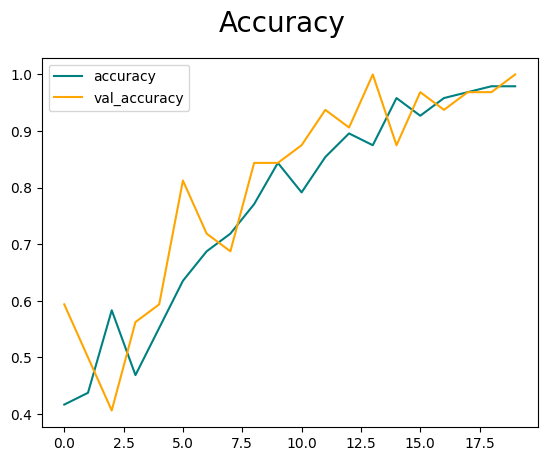

1/1 [==============================] - 0s 66ms/step
tf.Tensor(0.8888889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9285714, shape=(), dtype=float32)


In [197]:
print(Classes)
for image_class in MainClasses:
    i=0
    if i==0 :
        data = tf.keras.utils.image_dataset_from_directory('dataVerus')
        data_iterator = data.as_numpy_iterator()
        batch = data_iterator.next()
        
        train_size = int(len(data)*.700)
        val_size = int(len(data)*.200)
        test_size = int(len(data)*.100)+1  
        
        print(train_size,val_size,test_size)
        batch[0].shape
        
        train = data.take(train_size)
        val = data.skip(train_size).take(val_size)
        test = data.skip(train_size+val_size).take(test_size)
        
        
        print('Test Batchs:',len(test))
        
        
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
        from tensorflow.keras.applications import ResNet50
        
        model = Sequential()
        
        model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
        model.add(MaxPooling2D())
        model.add(Conv2D(32, (3,3), 1, activation='relu'))
        model.add(MaxPooling2D())
        model.add(Conv2D(16, (3,3), 1, activation='relu'))
        model.add(MaxPooling2D())
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        
        model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
        
        model.summary()
        
        logdir='logs'
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
        hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
        
        
        fig = plt.figure()
        plt.plot(hist.history['loss'], color='teal', label='loss')
        plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
        fig.suptitle('Loss', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()

        fig = plt.figure()
        plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
        plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
        fig.suptitle('Accuracy', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
        
        
        pre = Precision()
        re = Recall()
        acc = BinaryAccuracy()
        
        for batch in test.as_numpy_iterator(): 
            X, y = batch
            yhat = model.predict(X)
            pre.update_state(y, yhat)
            re.update_state(y, yhat)
            acc.update_state(y, yhat)
        print(pre.result(), re.result(), acc.result())
        
 # ------------------------------------------------------------------------------------------------  
    i += 1    
    if i!=0 :
        try:
            data = tf.keras.utils.image_dataset_from_directory(f'dataVerus/{image_class}')
            data_iterator = data.as_numpy_iterator()
            batch = data_iterator.next()
            
            train_size = int(len(data)*.700)
            val_size = int(len(data)*.200)
            test_size = int(len(data)*.100)+1  
            
            print(train_size,val_size,test_size)
            batch[0].shape
            
            train = data.take(train_size)
            val = data.skip(train_size).take(val_size)
            test = data.skip(train_size+val_size).take(test_size)
            
            
            print('Test Batchs:',len(test))
            
            
            from tensorflow.keras.models import Sequential
            from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
            from tensorflow.keras.applications import ResNet50
            
            model = Sequential()
            
            model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
            model.add(MaxPooling2D())
            model.add(Conv2D(32, (3,3), 1, activation='relu'))
            model.add(MaxPooling2D())
            model.add(Conv2D(16, (3,3), 1, activation='relu'))
            model.add(MaxPooling2D())
            model.add(Flatten())
            model.add(Dense(256, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            
            
            model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
            
            model.summary()
            
            logdir='logs'
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
            hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
            
            
            fig = plt.figure()
            plt.plot(hist.history['loss'], color='teal', label='loss')
            plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
            fig.suptitle('Loss', fontsize=20)
            plt.legend(loc="upper left")
            plt.show()
    
            fig = plt.figure()
            plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
            plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
            fig.suptitle('Accuracy', fontsize=20)
            plt.legend(loc="upper left")
            plt.show()
            from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
            
            
            pre = Precision()
            re = Recall()
            acc = BinaryAccuracy()
            
            for batch in test.as_numpy_iterator(): 
                X, y = batch
                yhat = model.predict(X)
                pre.update_state(y, yhat)
                re.update_state(y, yhat)
                acc.update_state(y, yhat)
            print(pre.result(), re.result(), acc.result())    
        except:
            pass
        

In [157]:
train_size = int(len(data)*.700)
val_size = int(len(data)*.200)
test_size = int(len(data)*.100)+1   

In [158]:
print(train_size,val_size,test_size)
batch[0].shape

3 1 1


(32, 256, 256, 3)

In [161]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [162]:
len(test)
from tensorflow.keras.applications import ResNet50

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(256, 256, 3))

model0 = Sequential([
    base_model,
    Dense(2, activation='softmax')
])

model0.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model0.fit(train_data, validation_data=val_data, epochs=epochs)

In [164]:
model = Sequential()

In [165]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [166]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [168]:
logdir='logs'

In [169]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [170]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 2s 482ms/step - loss: 852.5807 - accuracy: 0.4375 - val_loss: 145.0357 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 2s 443ms/step - loss: 78.2008 - accuracy: 0.5104 - val_loss: 40.5778 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 445ms/step - loss: 20.9671 - accuracy: 0.5625 - val_loss: 1.4260 - val_accuracy: 0.5312
Epoch 4/20
3/3 [==============================] - 2s 442ms/step - loss: 1.2229 - accuracy: 0.4792 - val_loss: 0.7754 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 1s 448ms/step - loss: 0.8370 - accuracy: 0.4688 - val_loss: 0.6278 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 1s 443ms/step - loss: 0.6740 - accuracy: 0.5312 - val_loss: 0.6049 - val_accuracy: 0.7188
Epoch 7/20
3/3 [==============================] - 1s 446ms/step - loss: 0.6893 - accuracy: 0.6250 - val_loss: 0.6253 - val_accuracy: 0.7812
Epoch 8/20
3/

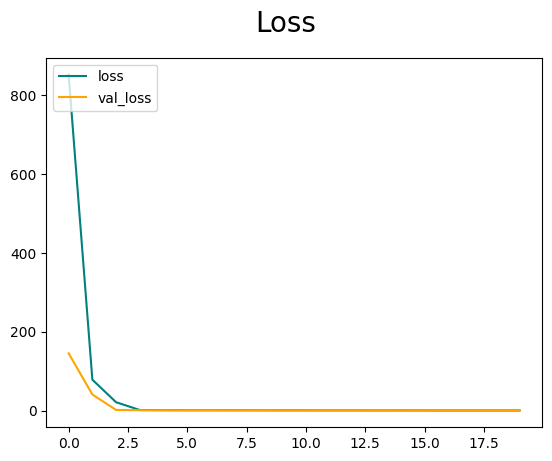

In [173]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

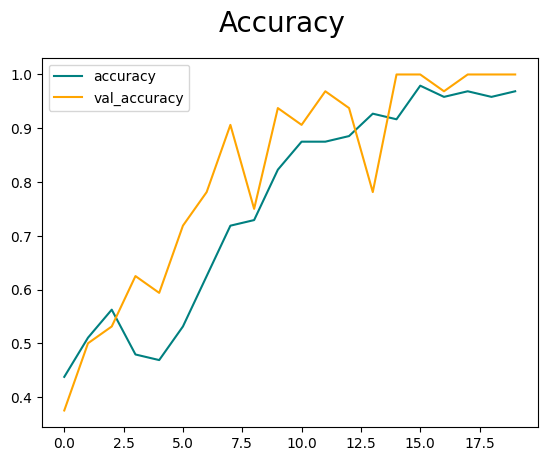

In [174]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [137]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result()) 

1/1 [==============================] - 0s 37ms/step


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


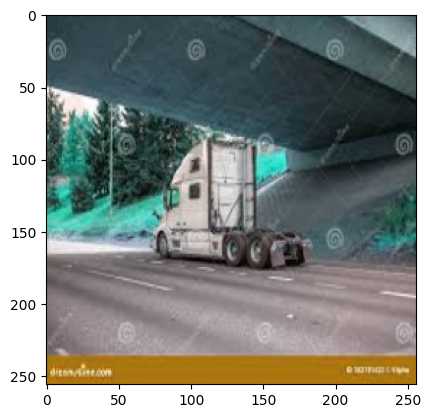

In [147]:
resize = tf.image.resize(img0, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


In [144]:
yhat

array([[0.45090386]], dtype=float32)